<a href="https://colab.research.google.com/github/JuanM-GG/modelos-tesis/blob/main/modelo_inhibicion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Título: Modelo de inhibición por sustrato

Autor: Juan Manuel Guiérrez García

Afiliación: Instituto Tecnológico de Morelia 

Fecha: Enero 2021

# Resumen

En el siguiente libro realizamos una análisis del modelo de inhibición por sustrato. Comenzamos por describir las estabilidad de los puntos de equilibrio mediante diagramas de plano de fase, diagramas de bifurcación, y la linealización del modelo. Posteriormente llevamos a cabo simulaciones para observar el comportamiento dinámico del modelo. Finalizamos por resaltar algunas diferencias entre el modelo de inhibición por sustrato y el modelo de Monod

# Descripción del proceso 

En un biorreactor continuo consideramos un flujo de entrada, $F_{in}$, y un flujo de salida, $F$, del biorreactor. Para mantener un volumen constante se debe cumplir que el flujo de alimentación y de salida sean iguales. Se consideran tres especies, la biomasa, $x$, el producto, $p$, y el sustrato, $s$. Además, suponemos que el flujo de alimentación solo contiene sustrato, $s_f$. En este caso, asumimos un efecto de inhibición por parte del sustrato sobre el crecimiento de la biomasa. 

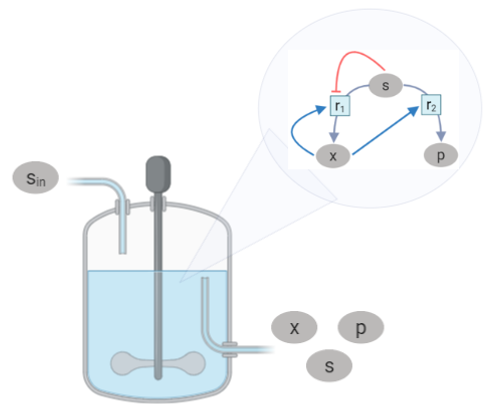

# Suposiciones

* La densidad es constante en todo el biorreactor

* La concentración de las especies es homogénea en todo el biorreactor

* Los parámetros cinéticos permanecen constantes durante la fermentación (esta es una suposición factible siempre y cuando la temperatura no cambie mucho)

* Solo existe un tipo de sustrato en el biorreactor del cual las células se pueden alimentar

* Solo existe un tipo de microorganismo en el biorreactor

Figura 1. Esquema de un biorreactor continuo en el que se presentan reacciones de transformación de sustrato en biomasa y producto. Además, se considera una inhibición del crecimiento por parte del sustrato

# Modelado de ecuaciones

El modelo dinámico se desarrolla escribiendo balances de materia total, para la biomasa (células), el sustrato (fuente de alimentación para las células) y el producto (metabolito generado). La biomasa crece alimentándose del sustrato.



### Balance de materia total 

$$acumulación\ de\ materia\ =\ entrada\ por\ flujo\ -\ salida\ por\ flujo$$

$$\frac{d(\rho V)}{dt} = F_{in} \rho - F_{out} \rho$$

Considerando que la densidad, $\rho$, es constante y que en un reactor continuo $F_{int} = F_{out} = F$

$$\frac{dV}{dt} = 0$$

En un reactor continuo el volumen permanece constante 

### Balance de materia para la biomasa

Ya que supusimos que no hay biomasa en el flujo de alimentación se tiene 

$$acumulación\ de\ biomasa\ =\ generación\ -\ salida\ por\ flujo$$


$$\frac{d(xV)}{dt} = r_x V - F x$$

Considerando que el volumen es constante y que la tasa de dilución se define como 

$$D = \frac{F}{V}$$

la cual es el inverso del tiempo de residencia y tiene unidades de $timepo^{-1}$

Se tiene que 

<a id = 'equatio-la-se2'></a>
$$
\frac{dx}{dt} = r_x - D x \tag{1}
$$

### Balance de materia para el sustrato 

$$acumulación\ de\ sustrato\ =\ entrada\ por\ flujo -\ salida\ por\ flujo -\ consumo$$ 

$$\frac{d(sV)}{dt} = F s_f - F s - r_s V$$ 

<a id = 'equation-la-se2'></a>
$$
\frac{ds}{dt} = D (s_f - s) - r_s \tag{2}
$$

### Balance de masa para el producto 

Al igual que la biomasa, no se encuentra producto presente en el flujo de alimentación

$$acumulación\ de\ producto\ =\ generación\ -\ salida\ por\ flujo$$

$$\frac{d(pV)}{dt} = r_p V - F p$$

<a id = 'equation-la-se2'></a>
$$
\frac{dp}{dt} = r_p  - D p \tag{3}
$$



## Tasa de crecimiento modelo de inhibición por sustrato 

La velocidad de crecimiento de biomasa, $r_x$, se expresa comunmente como 

$$r_x = \mu(s) x$$

Donde $\mu(s)$ suele ser una función del sustrato. Existen diversas expresiones para representar esta función. Algunas de ellas consideran efectos de inhibición por sustrato o por producto. Para nuestro análisis consideramos el modelo de inhibición por sustrato

<a id = 'equation-la-se2'></a>
$$
\mu = \mu_{max} \left( \frac{s}{k_s + s + k_i s^{2}} \right) \tag{4}
 $$

Donde $\mu_{max}$ es la tasa máxima de crecimiento, $k_s$ represente la concentración de sustrato a la cual se alcanza la mitad de la tasa máxima de crecimiento y $ki$ es una constante que representa el efecto de inhibición por el sustrato.

## Rendimientos

Para relacionar la velocidad de crecimiento de biomasa, $r_x$, con las velocidades de consumo de sustrato, $r_s$, y generación de producto, $r_p$, se emplean los rendimientos biomasa-sustrato y producto-biomasa, respectivamente. Estos rendimientos se definen como

Rendimiento biomasa-sustrato

$$Y_{xs} = \frac{r_x}{r_s}$$
Rendimiento producto-biomasa

$$Y_{px} = \frac{r_p}{r_x}$$
Donde $Y_{xs}$ y $Y_{px}$ son constantes.

Considerando lo anterior podemos reescribir las ecuaciones (1)-(3) como 

$$
\begin{aligned}

\frac{dx}{dt} &= r_x - Dx \\

\frac{ds}{dt} &= D(s_f - s) - \frac{1}{Y_{xs}} r_x \\

\frac{dp}{dt} &= Y_{px} r_x - D p

\end{aligned}
$$

Siendo 

$$r_x = \mu_{max}  \left( \frac{s}{k_s + s + k_i s^{2}} \right)x $$

In [2]:
# cargar librerias 
install.packages("deSolve")
library(deSolve)
install.packages("ggplot2")
library(ggplot2)
# cargar Grind.R
install.packages("rootSolve")
install.packages("FME")
source("Grind.R")

Loading required package: coda



grind.R was sourced


# Comparción entre modelo de Monod y modelo de inhibición por sustrato

In [ ]:
# monod equation 
monod <- function(s) {

  mu = mu_max*s/(ks + s)

  return(mu)
}

In [ ]:
# substrate inhibition equation 
subinhib <- function(s) {

  mu = mu_max*s/(ks + s + ki*s^2)

  return(mu)
}

In [ ]:
# establish parameter values

# monod
mu_max <- 0.53 # hr^-1
ks <- 0.12 # g/L
Y <- 0.4
sf <- 4.0 # g/L

# inhibition
mu_max <- 0.53 # h^-1
ks <- 0.12 # g/L
ki <- 0.4545 # g/L
sf <- 4.0 # g/L

In [ ]:
s <- seq(0,5,len=100)
mu_mod <- monod(s)
mu_inh <- subinhib(s)
data <- data.frame(s = s, monod = mu_mod, inhibition = mu_inh)


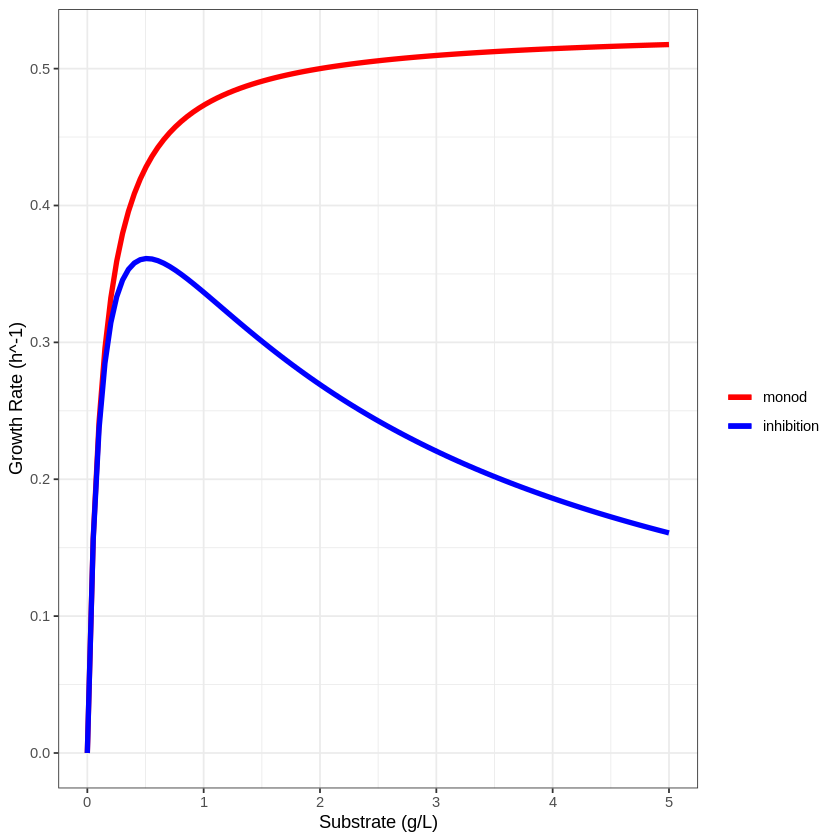

In [ ]:
ggplot(data,aes(s)) +
  geom_line(aes(y=monod, color = "monod"), lwd = 1.5) +
  geom_line(aes(y=inhibition, color = "inhibition"), lwd = 1.5) +
  scale_color_manual("", breaks = c("monod", "inhibition"),
                          values = c("red","blue")) +
  xlab("Substrate (g/L)") +
  ylab("Growth Rate (h^-1)") +
  theme_bw()

Figura 2. Comparación de modelo de Monod y modelo de inhibición por producto 

En la Fig.2 se observa como mientras el modelo de Monod decribe un incremento monótono de la tasa de crecimiento de biomasa el modelo de inhibición por sustrato muestra un pico y después una disminución. La decisión de qué modelo usar dependerá de las condiciones bajo las que se realiza la fermentación 

# Red para describir el proceso 

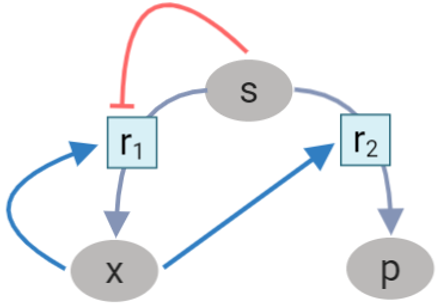

Figura 3. Red del proceso donde se observan las "reacciones" así como las especies que intervienen en estas reacciones y su efecto sobre las reacciones

En la Fig.3 se observa que para describir el presente proceso se consideran solamente dos reacciones, la reacción $r_1$ da lugar a la generación de biomasa a partir del sustrato, mientras que la reacción $r_2$ da lugar a la generación de producto a partir de sustrato. También se observa que la biomasa, $x$, tiene un efecto positivo sobre ambas reacciones mientras que el sustrato, $s$, tienen un efecto negativo sobre $r_1$.

# Análisis de estabilidad  modelo inhibición por sustrato 

Describir los puntos de equilibrio, explicar cómo los obtienen, y si esperan/observan bifurcaciones. Incluir código comentado o procedimiento algebraico. 

En las siguiente secciones se describen con detalle los puntos de equilibrio así como su dependencia con respecto a los parámetros del modelo. Sin embargo, aquí se muestran los dos puntos de equilibrio que se encontraron:

<a id = 'equation-la-se2'></a>
$$
\frac{ds}{dt} = 0 \hspace{1cm}  \rightarrow \hspace{1cm} D(s_{f} - s) - r_{s} = 0 \tag{5}
$$

<a id = 'equation-la-se2'></a>
$$
\frac{dx}{dt} = 0 \hspace{1cm}  \rightarrow \hspace{1cm}  r_{x} - Dx = 0 \tag{6}
$$

<a id = 'equation-la-se2'></a>
$$
\frac{dp}{dt} = 0 \hspace{1cm}  \rightarrow \hspace{1cm}  r_{p} - Dp = 0 \tag{7}
$$

Resolviendo las ecuaciones (5)-(7) para las variables $s$ y $x$, se obtienes los siguientes puntos de equilibrio:

$$ss_{1}: \hspace{1cm} \bar{s} = s_{f}, \hspace{0.25cm} \bar{x} = 0, \hspace{0.25cm} \bar{p} = 0$$ \

$$ss_{2}: \hspace{1cm} \bar{s} = \frac{-(1- \frac{\mu_{max}}{D}) - \sqrt{(1-\frac{\mu_{max}}{D})^2 - 4 k_i k_s}}{2k_i}$$ \\

$$\hspace{0.25cm} \bar{x} = Y_{xs} (s_f - \bar{s}), \hspace{0.25cm} \bar{p} = Y_{px} \bar{x} $$ \\

$$ss_{3}: \hspace{1cm} \bar{s} = \frac{-(1- \frac{\mu_{max}}{D}) + \sqrt{(1-\frac{\mu_{max}}{D})^2 - 4 k_i k_s}}{2k_i}$$ \\

$$\hspace{0.25cm} \bar{x} = Y_{xs} (s_f - \bar{s}), \hspace{0.25cm} \bar{p} = Y_{px} \bar{x} $$ \\

El primer punto de equilibrio, $ss_1$, se considera un punto de equilibrio trivial, en el cual no existe biomasa presente en el birreactor y la concentración de sustrato es igual a la concentración de sustrato en la alimentación. Como veremos más adelante, este punto de equilibrio es inestable a valores bajos de la tasa de dilución, $D$, y estable a valores altos.

Puntos de equilibrio obtenidos con Python.

https://github.com/JuanM-GG/sistemas-dinamicos-Python/blob/main/steady_state_inhibition.ipynb

Como es posible observar del modelo matemático, las ecuaciones de sustrato y biomasa están desacopladas de la ecuación del producto, más aún, el punto de equilibrio del producto es solo un múltiplo del punto de equilibrio de la biomasa. Por lo anterior, en lo siguiente consideramos solamente las ecuaciones para la biomasa y el sustrato 

Empezamos por estudiar un proceso con los siguientes parámetros 

Tabla 1. Parámetros empleados durante el análisis 

|parámetros cinético | parámetro de operación | 
|:---:|:---:|
| $\mu_{max} = 1.2\ h^{-1}$ | $s_f = 50\ g/L$|
| $k_{s} = 180\ g/L$ | $D = 0.05 h^{-1}$|
| $k_i = 0.3\ L/g$ | |
| $Y_{xs} = 0.1 $ | |

In [13]:
model <- function(times, state, parms) {
  with(as.list(c(state, parms)), {

    # velocidad de crecimiento (inhibición por sustrato)
    rx = mu_max*s/(ks + s + ki*s^2)*x

    # velocidad de consumo de sustrato
    rs = (1/Yxs)*rx

    # balance de materia para el sustrato
    dsdt = D*(sf - s) - rs

    # balance de materia para la biomasa
    dxdt = rx - D*x

    return(list(c(dsdt,dxdt))) 
  })
}

In [103]:
# establecer parámetros 
p <- c(mu_max = 1.2, ks = 180, ki = 0.3, Yxs = 0.2, sf = 50, D = 0.05)

In [104]:
# condiciones iniciales
s <- c(s = 10, x = 0.1)

In [105]:
# función para calcular los puntos de equilibrio
steady_state <- function(p) {
        with(as.list(p), {
                
                # Primer punto de equilibrio
                s1 = sf
                x1 = 0
                ss1 = c(s = s1, x = x1)
                
                # segundo punto de equilibrio
                s2 = (-(1-mu_max/D) - sqrt((1-mu_max/D)^2 - 4*ki*ks))/(2*ki)
                x2 = Yxs*(sf - s2)
                ss2 = c(s = s2, x = x2)
                
                # segundo punto de equilibrio
                s3 = (-(1-mu_max/D) + sqrt((1-mu_max/D)^2 - 4*ki*ks))/(2*ki)
                x3 = Yxs*(sf - s3)
                ss3 = c(s = s3, x = x3)
                
                
                return(list(ss1 = round(ss1, 3),ss2 = round(ss2, 3), ss3 = round(ss3, 3)))
        })
}

¿Cuáles son los puntos de equilibrio para el valor de los parámetros que hemos establecido?

In [106]:
steady_state(p)

$ss1
 s  x 
50  0 

$ss2
    s     x 
8.847 8.231 

$ss3
     s      x 
67.820 -3.564

Para ver los puntos de equilibrio en un plano de fase, junto con las ceroclinas, usamos la función `plane()` y la función `newton()`

       s        x 
8.846990 8.230602 
Stable point, eigenvalues:  -0.1714498 -0.05 


s        x 
8.846990 8.230602

     s      x 
67.820 -3.564 
Stable point, eigenvalues:  -0.05 -0.009684749 


s      x 
67.820 -3.564

 s  x 
50  0 
Unstable point, eigenvalues:  -0.05 0.01122449 


s  x 
50  0

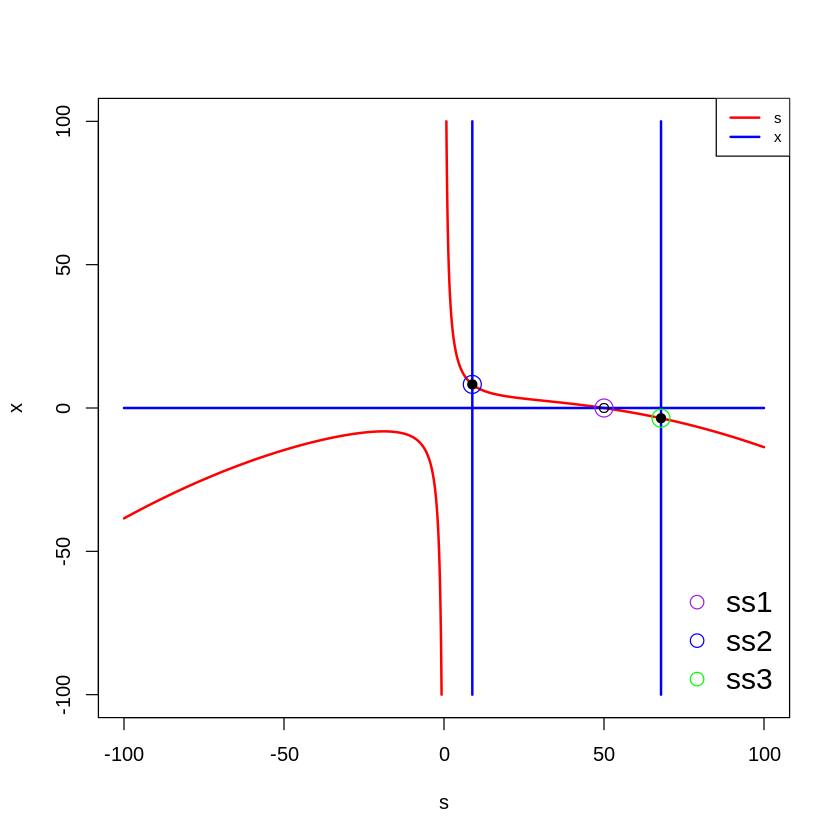

In [179]:
plane(xmin = -100, xmax = 100, ymin = -100, ymax = 100)
newton(state = c(s = 8.846, x = 8.231), plot = T)
newton(state = c(s = 67.82, x = -3.564), plot = T)
newton(state = c(s = 50, x = 0), plot = T)

# para distinguir entre los puntos de equilibrio 
ss_plot <- steady_state(p)
points(x = ss_plot$ss1[1], y = ss_plot$ss1[2], col = "purple", pch = 21, cex = 2)
points(x = ss_plot$ss2[1], y = ss_plot$ss2[2], col = "blue", pch = 21, cex = 2)
points(x = ss_plot$ss3[1], y = ss_plot$ss3[2], col = "green", pch = 21, cex = 2)
legend("bottomright", legend = c("ss1","ss2","ss3"), 
      col = c("purple", "blue", "green"), pch = 21, bty = "n", cex = 1.5)

De acuerdo con la la salida anterior, el punto de equilibrio $ss_1$ $(s = 50, x = 0)$ es inestable, mientras que los puntos de equilibrio $ss_2$ $(s = 8.847, x = 8.231)$ y $ss_3$ $(s = 67.82, x = -3.564)$ son estables. Hay que considerar, sin embargo, que el punto de equilibrio $ss_3$ es físicamente infactible. Como veremos más adelante, la estabilidad de estos puntos de equilibrio depende del parámetro $D$. 

### Efecto del parámetro D sobre el punto de equilibrio

       s        x 
6.666663 8.666667 
Stable point, eigenvalues:  -0.2166668 -0.04 
           s            x 
5.000000e+01 2.208469e-07 
Unstable point, eigenvalues:  -0.04 0.02122449 
        s         x 
90.000109 -8.000022 
Stable point, eigenvalues:  -0.04 -0.01481487 


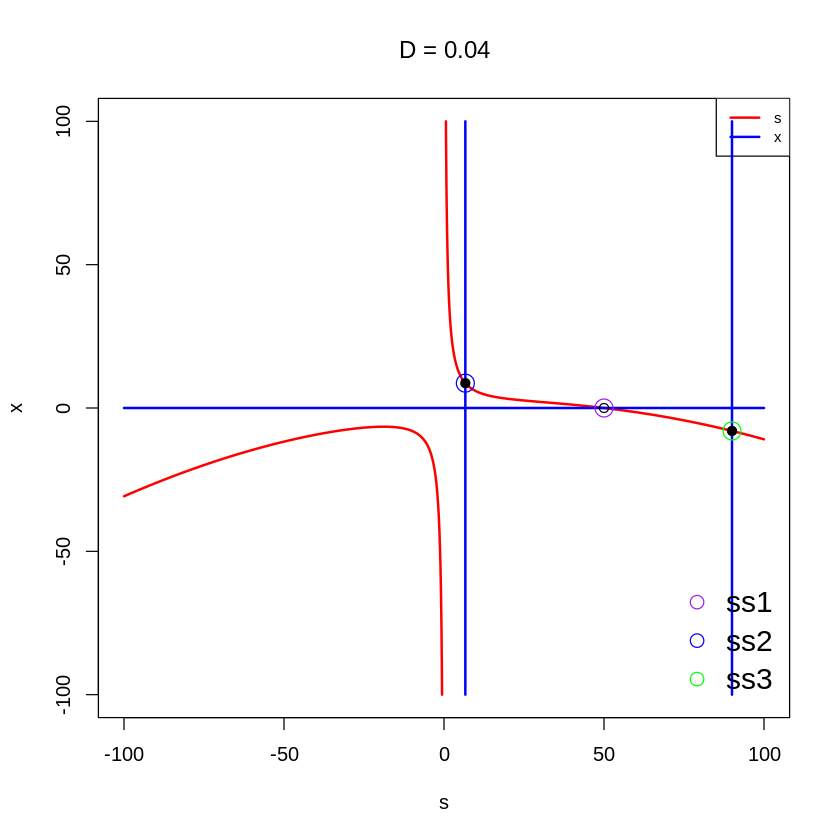

       s        x 
8.846990 8.230602 
Stable point, eigenvalues:  -0.1714498 -0.05 
 s  x 
50  0 
Unstable point, eigenvalues:  -0.05 0.01122449 
     s      x 
67.820 -3.564 
Stable point, eigenvalues:  -0.05 -0.009684749 


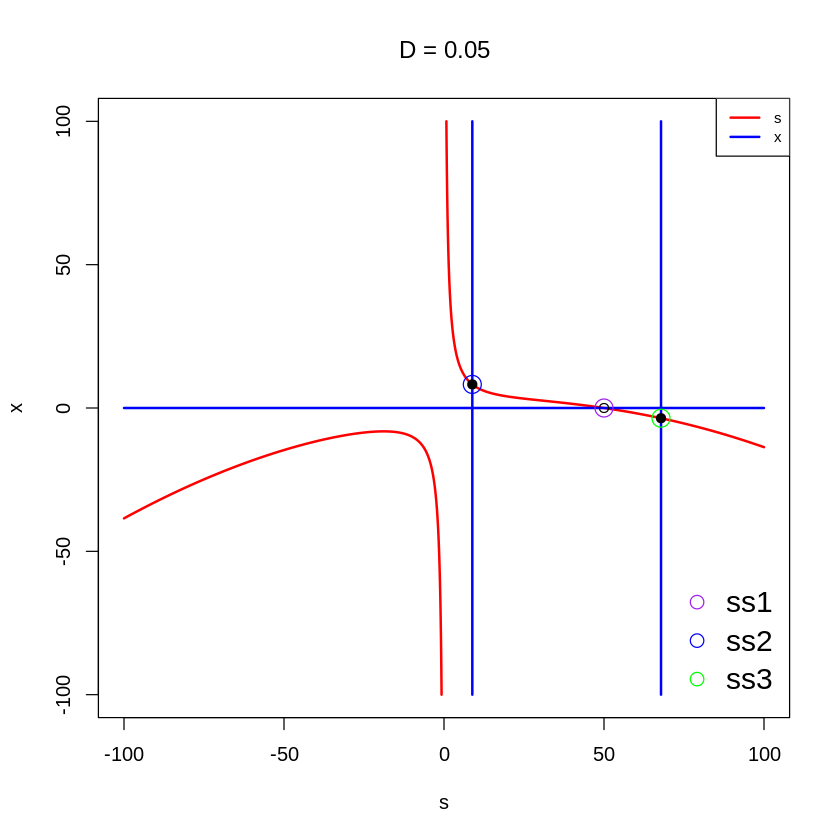

        s         x 
11.924625  7.615075 
Stable point, eigenvalues:  -0.1140331 -0.061 
           s            x 
4.999999e+01 1.167667e-06 
Unstable point, eigenvalues:  -0.061 0.0002244981 
          s           x 
50.31574837 -0.06314967 
Stable point, eigenvalues:  -0.061 -0.0002241195 


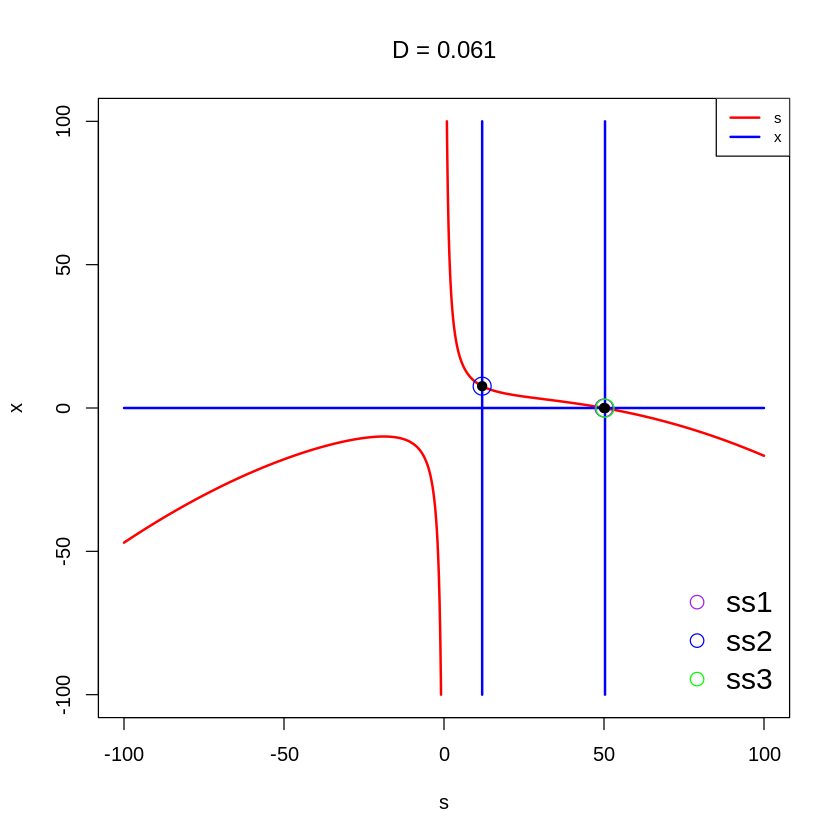

        s         x 
15.775119  6.844976 
Stable point, eigenvalues:  -0.07000001 -0.05915873 
        s         x 
38.033238  2.393352 
Unstable point, eigenvalues:  -0.07 0.008579741 
            s             x 
 5.000000e+01 -2.049854e-08 
Stable point, eigenvalues:  -0.07 -0.00877551 
 s  x 
50  0 
Stable point, eigenvalues:  -0.08 -0.01877551 
 s  x 
50  0 
Stable point, eigenvalues:  -0.08 -0.01877551 
 s  x 
50  0 
Stable point, eigenvalues:  -0.08 -0.01877551 


Warning message in sqrt((1 - mu_max/D)^2 - 4 * ki * ks):
“NaNs produced”
Warning message in sqrt((1 - mu_max/D)^2 - 4 * ki * ks):
“NaNs produced”


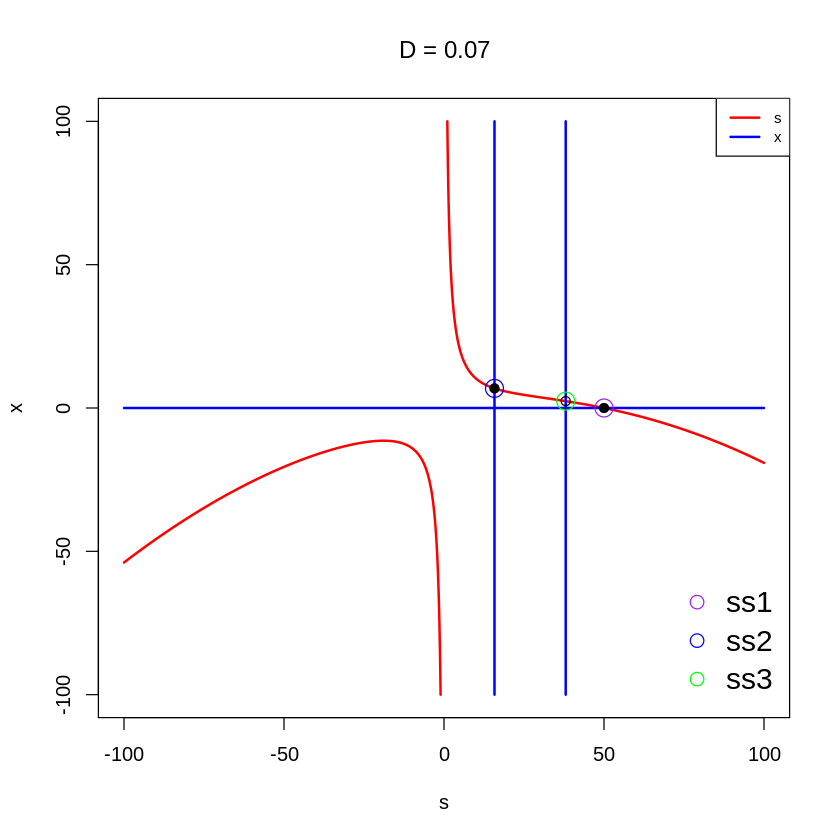

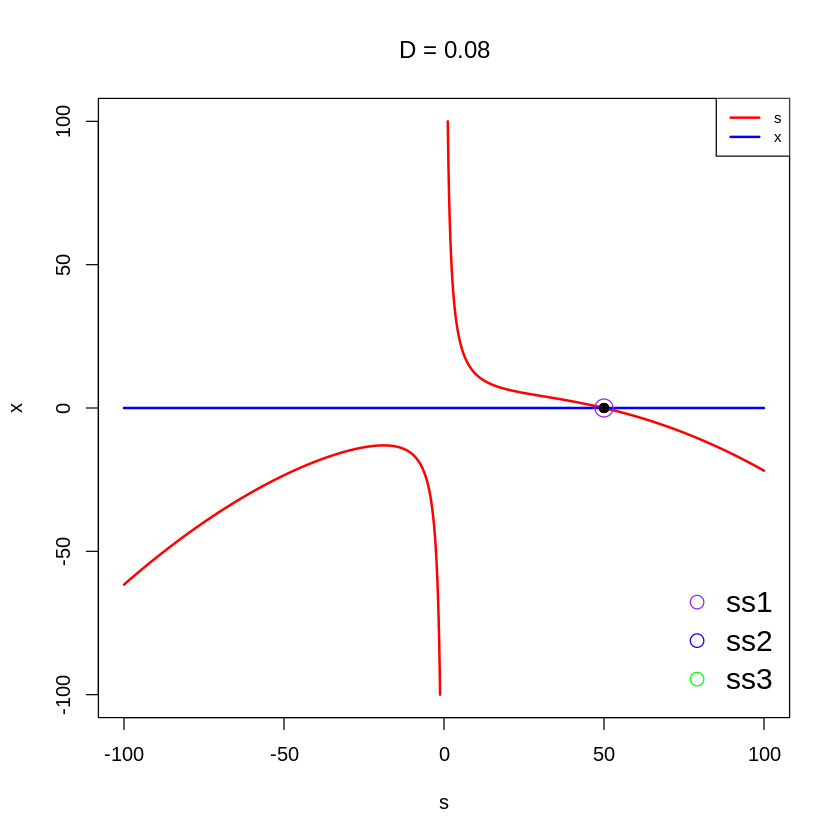

In [180]:
for (D in c(0.04,0.05,0.061, 0.07,0.08)) {
  p <- c(mu_max = 1.2, ks = 180, ki = 0.3, Yxs = 0.2, sf = 50, D = D)
  plane(xmin = -100, xmax = 100, ymin = -100, ymax = 100, main = paste0("D = ", D))

  # para determinar la estabilidad
  newton(state = c(s = 8.846, x = 8.231), plot = T)
  newton(state = c(s = 40, x = 5), plot = T)
  newton(state = c(s = 67.82, x = -3.564), plot = T)

  # para distinguir entre los puntos de equilibrio 
  ss_plot <- steady_state(p)
  points(x = ss_plot$ss1[1], y = ss_plot$ss1[2], col = "purple", pch = 21, cex = 2)
  points(x = ss_plot$ss2[1], y = ss_plot$ss2[2], col = "blue", pch = 21, cex = 2)
  points(x = ss_plot$ss3[1], y = ss_plot$ss3[2], col = "green", pch = 21, cex = 2)
  legend("bottomright", legend = c("ss1","ss2","ss3"), 
        col = c("purple", "blue", "green"), pch = 21, bty = "n", cex = 1.5)
}

p["D"] <- 0.05 # Regresar D a su valor original

En los diagramas de plano de fase se aprecia que cuando $D < 0.06$ existen tres puntos de equilibrio, siendo dos de ellos estables y uno inestable. Cuando $D > 0.06$ la estabilidad de estos puntos de equilibrio se ve modificada, pero siguen existiendo tres puntos de equilibrio. Se observa que cuando $D = 0.08$, ya solo existe un punto de equilibrio, y es el equilibrio trivial en el que $\bar{x} = 0$. A continuación analizamos este comportamiento a detalle 

##¿Por qué solo existe un punto de equilibrio cuando $D$ > 0.08?

Para responder esta pregunta debemos recordar que los puntos de equilibrio $ss_2$ y $ss_3$ requieren que 

<a id = 'equation-la-se2'></a>
$$
\left( 1 - \frac{\mu_{max}}{D} \right)^{2} - 4 k_i k_s > 0 \tag{6}
$$

Dado que de otra manera $\bar{s}$ no sería un número real. A paritr de (6) vemos que 

$$ \left( 1 - \frac{\mu_{max}}{D} \right)^{2} > 4 k_i k_s $$

$$ \lvert 1 - \frac{\mu_{max}}{D} \rvert > \sqrt{4 k_i k_s} $$

dado que $\mu_{max} > D$ sabemos que

$$1 - \frac{\mu_{max}}{D} < 0$$

Por lo tanto 

$$1 - \frac{\mu_{max}}{D} < - \sqrt{4 k_i k_S}$$

despejando $D$

<a id = 'equation-la-se2'></a>
$$
D < \frac{\mu_{max}}{1 + 2\sqrt{k_i k_s}} \tag{7}
$$


De (7) vemos que existe un valor límite de $D$ por arriba del cual se pierden los dos puntos de equilibrio $ss_1$ y $ss_2$. Para calcular este valor límite creamos una función 

In [175]:
# función para calcular valor crítico de D
D_lim <- function(p) 
{
  with(as.list(p), {

    D_crit = mu_max/(1+2*sqrt(ki*ks))

    return(D_crit)
  })
}

In [176]:
# valor crítico D
cat("D_lim: ", D_lim(p), "h^-1")

D_lim:  0.07644803 h^-1

De acuerdo con la salida anterior, el valor del parámetro $D$ que determina si existen o no los puntos de equilibrio $ss_2$ y $ss_3$ es $D_{lim} = 0.0764\ h^{-1}$. Esto explica porque cuando en el diagrama de plano de fase pasamos de $D = 0.7$, a $D = 0.08$, ya solo observamos el punto de equilibrio $ss_1$

## ¿Por qué la estabilidad de los puntos de equilibrio cambia alrededor de $D = 0.06$?

De los diagramas de plano de fase se puede ver que el cambio en la estabilidad de los puntos de equilibrio $ss_1$ y $ss_3$ ocurre  cuando el valor de $\bar{s}$ en el punto de equilibrio $ss_3$ es igual a $s_f$, es decir 

<a id = 'equation-la-se2'></a>
$$ 
\frac{-(1- \frac{\mu_{max}}{D}) + \sqrt{(1-\frac{\mu_{max}}{D})^2 - 4 k_i k_s}}{2k_i} = s_f \tag{8}
$$

Resolviendo (8) para $D$ se tiene 

$$D = \frac{\mu_{max} s_f}{k_i s_f^2 + k_s + s_f}$$

La solución a (8) se puede obtener a través de la librería `sympy` de Python en el siguiente link 

https://github.com/JuanM-GG/modelos-tesis/blob/main/punto_bifurcacion_modelo_inhibicion.ipynb


Para calcular este valor creamos una función 

In [135]:
D_bif <- function(p) {
  with(as.list(p), {

    D_bif = mu_max*sf/(ki*sf^2 + ks + sf)

    return(D_bif)
  })
}

In [136]:
cat("D_bif:", D_bif(p))

D_bif: 0.06122449

Vemos que el cambio de estabilidad en los puntos de equilibrio ocurre en $D_{bif} = 0.06122\ h^{-1}$. Esto es congruente con los diagramas de plano de fase, y como veremos a continuación, un diagrama de bifurcación nos permite ver de forma más clara el cambio de estabilidad en este valor 

# Diagrama de bifurcación 

Para resumir las observaciones anteriores graficamos el diagrama de bifurcación junto con el valor crítico $D_{crit}$ y el valor $D_{bif}$ en el que ocurre el cambio de estabilidad 

 s  x 
90 -8 
Stable point, eigenvalues:  -0.04 -0.01481482 
Starting at D = 0.04 with:
 s  x 
90 -8 
       s        x 
8.846990 8.230602 
Stable point, eigenvalues:  -0.1714498 -0.05 
Starting at D = 0.05 with:
       s        x 
8.846990 8.230602 
Turning point point at D = 0.07644531 
Bifurcation at D = -3.816392e-17 


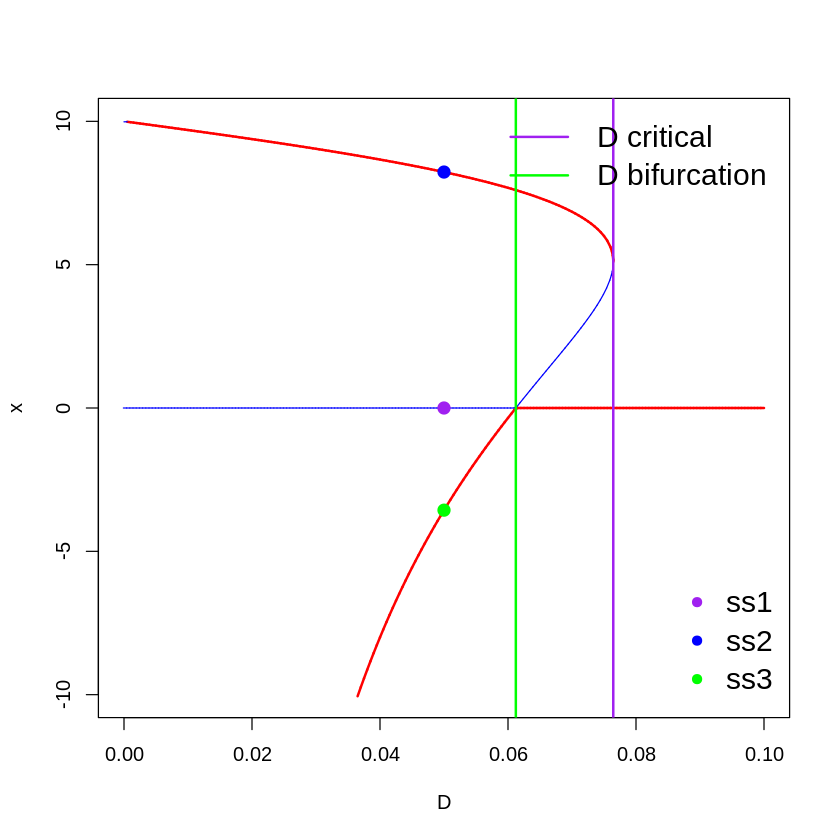

In [181]:
# para graficar la parte donde (s = sf, x = 0) es estable necesitamos seleccionar un valor de D
# donde este punto de equilibrio sea estable, por ejemplo D = 0.04
ss_plot <- steady_state(p)
p["D"] <- 0.04
ss1 <- newton(state = c(s = 80, x = -5))
continue(state = ss1, parms = p, odes = model, x = "D", 
         step = 0.005, xmin = 0.0, xmax = 0.1, y = "x", ymin = -10, ymax = 10)
p["D"] <- 0.05
ss2 <- newton(state = c(s = 8.846, x = 8.231))
continue(state = ss2, parms = p, odes = model, x = "D", 
         step = 0.005, xmin = 0.0, xmax = 0.1, y = "x", ymin = -10, ymax = 10, add = T)
abline(v = D_crit(p), col = "purple", lwd = 2)
abline(v = D_bif(p), col = "green", lwd = 2)
points(x = p["D"], y = ss_plot$ss1[2], col = "purple", pch = 20, cex = 2)
points(x = p["D"], y = ss_plot$ss2[2], col = "blue", pch = 20, cex = 2)
points(x = p["D"], y = ss_plot$ss3[2], col = "green", pch = 20, cex = 2)
legend("topright", legend = c("D critical","D bifurcation"), 
        col = c("purple", "green"), lty = 1, bty = "n", lwd = 2, cex = 1.5)
legend("bottomright", legend = c("ss1","ss2","ss3"), 
        col = c("purple", "blue", "green"), pch = 20, bty = "n", cex = 1.5)

No es lo que ocurre en Dcrit otra bifurcación? Porque el número de puntos de equilibrio cambia podría ser una bifurcación de tipo nodo-silla. Lo que ocurre en D* es una bifurcación transcrítica?. La estabilidades de los puntos de equilibrio $ss_1$ y $ss_3$ se modifica, pero no la del punto de equilibrio $ss_2$

A dynamical system, say (7.1), has a bistable solution if there are two stable states for a fixed parameter μ and the steady state obtained depends on the history of the system

Vemos como para valores de $D$ bajos, en específico $D < D^{*}$, los puntos de equilibrio $ss_2$ y $ss_3$ son estables. Sin embargo, solo $ss_2$ es físicamente factible. El punto de equilibrio trivial $ss_1$ no es estable. Cuando $D > D^{*}$ el punto de equlibrio trivial $ss_1$ se vuelve estable, mientras que el punto de equilibrio $ss_3$ se vuelve inestable. Para valores grandes de $D$, en específico $D > D_{crit}$, solo existe el punto de equilibrio $ss_1$ y es estable.    

 s  x 
90 -8 
Stable point, eigenvalues:  -0.04 -0.01481482 
Starting at D = 0.04 with:
 s  x 
90 -8 
       s        x 
8.846990 8.230602 
Stable point, eigenvalues:  -0.1714498 -0.05 
Starting at D = 0.05 with:
       s        x 
8.846990 8.230602 
Turning point point at D = 0.07644531 
Bifurcation at D = -3.816392e-17 


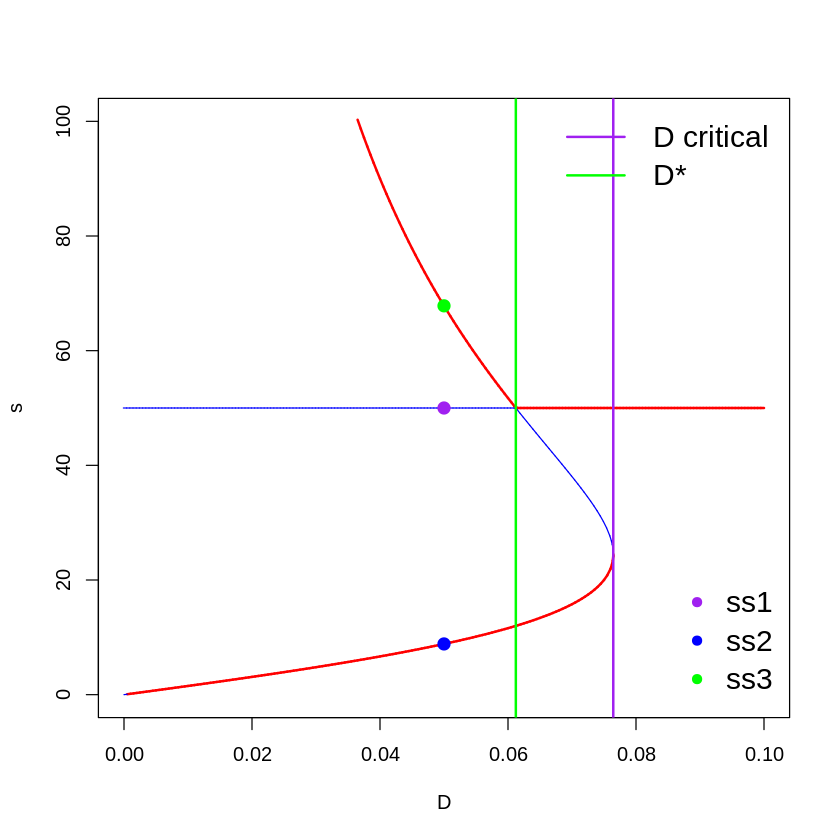

In [167]:
ss_plot <- steady_state(p)
p["D"] <- 0.04
ss1 <- newton(state = c(s = 80, x = -5))
continue(state = ss1, parms = p, odes = model, x = "D", 
         step = 0.005, xmin = 0.0, xmax = 0.1, y = "s", ymin = 0, ymax = 100)
p["D"] <- 0.05
ss2 <- newton(state = c(s = 8.846, x = 8.231))
continue(state = ss2, parms = p, odes = model, x = "D", 
         step = 0.005, xmin = 0.0, xmax = 0.1, y = "s", ymin = 0, ymax = 100, add = T)
abline(v = D_crit(p), col = "purple", lwd = 2)
abline(v = D_bif(p), col = "green", lwd = 2)
points(x = p["D"], y = ss_plot$ss1[1], col = "purple", pch = 20, cex = 2)
points(x = p["D"], y = ss_plot$ss2[1], col = "blue", pch = 20, cex = 2)
points(x = p["D"], y = ss_plot$ss3[1], col = "green", pch = 20, cex = 2)
legend("topright", legend = c("D critical","D*"), 
        col = c("purple", "green"), lty = 1, bty = "n", lwd = 2, cex = 1.5)
legend("bottomright", legend = c("ss1","ss2","ss3"), 
        col = c("purple", "blue", "green"), pch = 20, bty = "n", cex = 1.5)

# Restricciones en el punto de equilibrio 

Antes vimos que una condición para que existan los puntos de equilibrio $ss_2$ y $ss_3$ es

$$D < \frac{\mu_{max}}{1 + 2 \sqrt {k_i k_m}}$$

Para darle una interpretación física a esta restricción vale la pena analizar lo que ocurre con la tasa de crecimiento conforme $D$ incrementa. A continuación realizamos la gráfica de $\mu(s)$

In [ ]:
# función para graficar tasas de crecimiento y dilución 
rates <- function(p) {
  with(as.list(p), {

    s <- seq(0,250,len=1000)
    # tasa de crecimiento 
    mu = mu_max*s/(ks + s + ki*s^2)

    # tasa de dilución 
    D = rep(D, length(s))

    data = data.frame(s=s,mu=mu,D=D)

    return(data)

  })
}

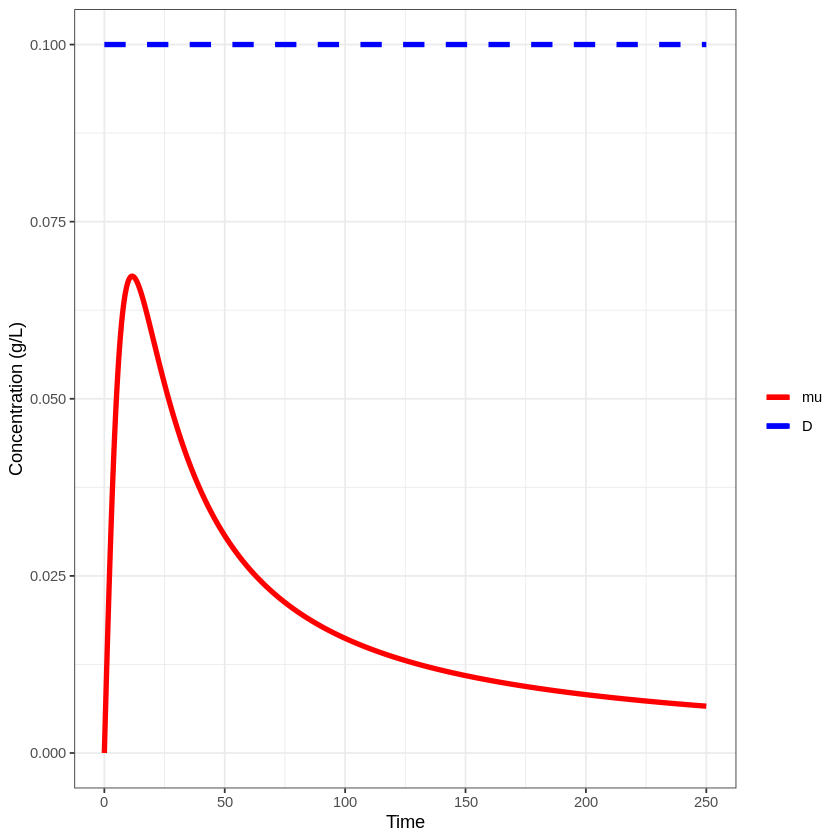

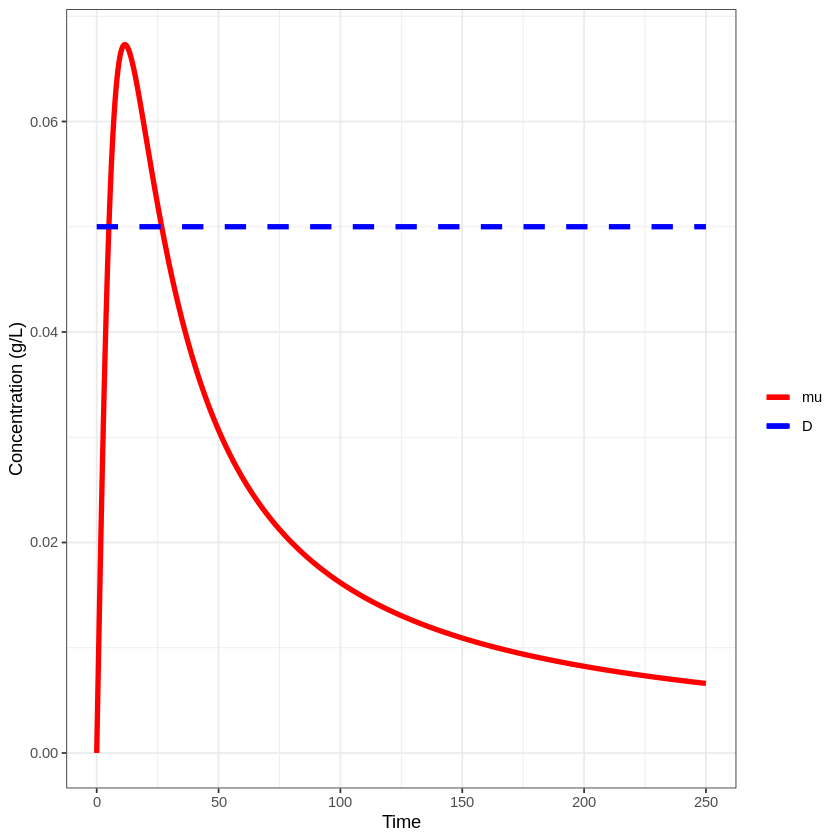

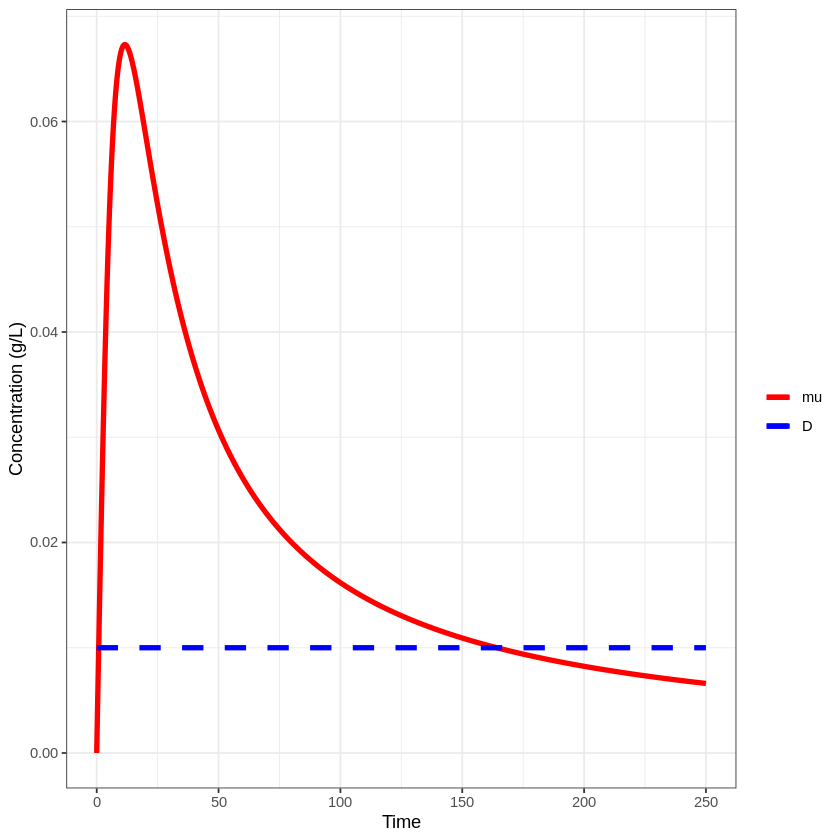

In [ ]:
for (D in c(0.1,0.05,0.01)) {
  p <- c(mu_max = 1, ks = 80, Y = 0.1, D = D, sf = 10, ki = 0.6)
  data <- rates(p)
  # graficar tasas 
  print(
    ggplot(data,aes(s)) +
    geom_line(aes(y = mu, color = "mu"), lwd = 1.5) +
    geom_line(aes(y = D, color = "D"), lwd = 1.5, lty = 2) + 
    scale_color_manual("", breaks = c("mu","D"), values = c("red", "blue")) +
    xlab("Time") +
    ylab("Concentration (g/L)") +
    theme(title = paste0("D = ", D)) +
    theme_bw()
  )
}

Para que exista un equilibrion en la concentración de biomasa, es decir, $dx/dt = 0$, es necesarion que la tasa de crecimiento iguale a la tasa de dilución, pero como se puede observar en la salida anterior, si la tasa de dilución es demasiado grande, no importa cuando aumente $s$, las tasas no serán iguales. 

Para determinar cuál es est valor de la tasa de dilución $D$ que no se debe sobrepasar para que exista un equilibrio, podemos obtener el máximo de la función que representa la tasa de crecimiento

$$\mu(s) = \frac{\mu_{max}s}{k_s + s + k_is^2}$$

$$\frac{\partial \mu(s)}{\partial s} = \mu \left( \frac{k_s - k_i s^2}{(k_s + s + k_i s^2)^2} \right) $$

$$\frac{\partial \mu(s)}{\partial s} = 0 \hspace{1cm} \rightarrow \hspace{1cm} s_{max} = \sqrt \frac{k_s}{k_i}$$

Evaluando $\mu(s)$ en este valor de $s$ encontramos que el máximo de la función es

$$\mu(s_{max}) = \frac{\mu_{max}}{1 + 2\sqrt {k_s k_i}}$$

Por lo tanto 

$$D < \frac{\mu_{max}}{1 + 2\sqrt {k_s k_i}}$$

Lo concuerda con lo que obtuvimos anteriormente 

# Linealización

El siguiente analisis se puede obtener usando la función `newton()`, sin embargo, se considera importante observar la manera en la que se calcula la estabilidad de los puntos de equilibrio a partir de la linealización del sistema de EDO.

Las derivadas parciales en la matriz Jacobiana se pueden obtener mediante la librería `sympy` de Python. https://github.com/JuanM-GG/sistemas-dinamicos-Python/blob/main/puntos_de_equilibrio_monod.ipynb

In [190]:
# función que calcula la matriz Jacobiana en el punto de equilibrio 
my_jacobi <- function(ss,p) {
  with(as.list(c(ss,p)), { 

    dfdx = mu_max*s/(ki*s**2 + ks + s) - D
    dfds = mu_max*x*(ks - ki*s**2)/(ks + s + ki*s**2)**2
    dgdx = - mu_max*s/(Yxs*(ki*s**2 + ks + s))
    dgds = -D - (1/Yxs)*mu_max*x*(ks - ki*s**2)/(ks + s + ki*s**2)**2

    A = matrix(c(dfdx,dfds,dgdx,dgds), nrow = 2, byrow = T)

    trace = dfdx + dgds

    det = dfdx*dgds - dgdx*dfds

    lamda1 = (trace - (trace**2 - 4*det)^{1/2})/2
    lamda2 = (trace + (trace**2 - 4*det)^{1/2})/2

    out = list(A = A, eigenvals = c(lamda1 = round(lamda1, 3), lamda2 = round(lamda2, 3)))

    return(out)

  })
}

Es esta parte es importante recordar el valor de los parámetros que hemos establecido 

In [183]:
print(p)

mu_max     ks     ki    Yxs     sf      D 
  1.20 180.00   0.30   0.20  50.00   0.05 


In [188]:
# obtener puntos de equilibrio 
ss1 <- steady_state(p)$ss1
ss2 <- steady_state(p)$ss2
ss3 <- steady_state(p)$ss3
cat("ss1: \n")
cat("s = ",ss1[1],"x = ",ss1[2],"\n")
cat("ss2: \n")
cat("s = ",ss2[1],"x = ",ss2[2],"\n")
cat("ss3: \n")
cat("s = ",ss3[1],"x = ",ss3[2],"\n")

ss1: 
s =  50 x =  0 
ss2: 
s =  8.847 x =  8.231 
ss3: 
s =  67.82 x =  -3.564 


In [192]:
# evaluar matriz Jacobiana en punto de equilibrio ss1
J1 <- my_jacobi(ss1, p)
print(J1)

$A
            [,1]  [,2]
[1,]  0.01122449  0.00
[2,] -0.30612245 -0.05

$eigenvals
lamda1 lamda2 
-0.050  0.011 



Dado que los eigenvalores tienen signo opuesto vemos que el punto de equilibrio $ss_1$ es inestable. En particula, es un punto silla 

In [193]:
# evaluar matriz Jacobiana en punto de equilibrio ss2
J2 <- my_jacobi(ss2, p)
print(J2)

$A
              [,1]        [,2]
[1,]  4.175148e-08  0.03429159
[2,] -2.500002e-01 -0.22145794

$eigenvals
lamda1 lamda2 
-0.171 -0.050 



En este caso vemos que los eigenvalores números negativos reales, por esta razón sabemos que el punto de equilibrio $ss_2$ es un nodo estable

In [194]:
# evaluar matriz Jacobiana en punto de equilibrio ss2
J2 <- my_jacobi(ss2, p)
print(J2)

$A
              [,1]        [,2]
[1,]  4.175148e-08  0.03429159
[2,] -2.500002e-01 -0.22145794

$eigenvals
lamda1 lamda2 
-0.171 -0.050 



Al igual que con el punto de equilibrio $ss_2$, los eigenvalores de $ss_3$ son ambos números negativos reles, por lo tanto, este punto de equilibrio es un nodo estable 

Estos resultados son los mismos que el obtenido con la fución `newton()`

#	Análisis dinámico (integración numérica)

A continuación realizamos la integración numérica para evaluar el comportamiento dinámico del modelo

Aquí es importante recordad el valor de los parámetros que hemos establecido 

In [212]:
print(p)

mu_max     ks     ki    Yxs     sf      D 
  1.20 180.00   0.30   0.20  50.00   0.05 


In [213]:
# tiempo de simulación 
times <- seq(0,500,len=1000)

In [214]:
# resolver EDOs
out <- ode(func = model, y = s, times = times, parms = p, method = "rk4")

In [215]:
# guardar resultados
out <- as.data.frame(out)
# añadir puntos de equilibrio 
out$s_ss <- rep(ss2[1], length(times))
out$x_ss <- rep(ss2[2], length(times))

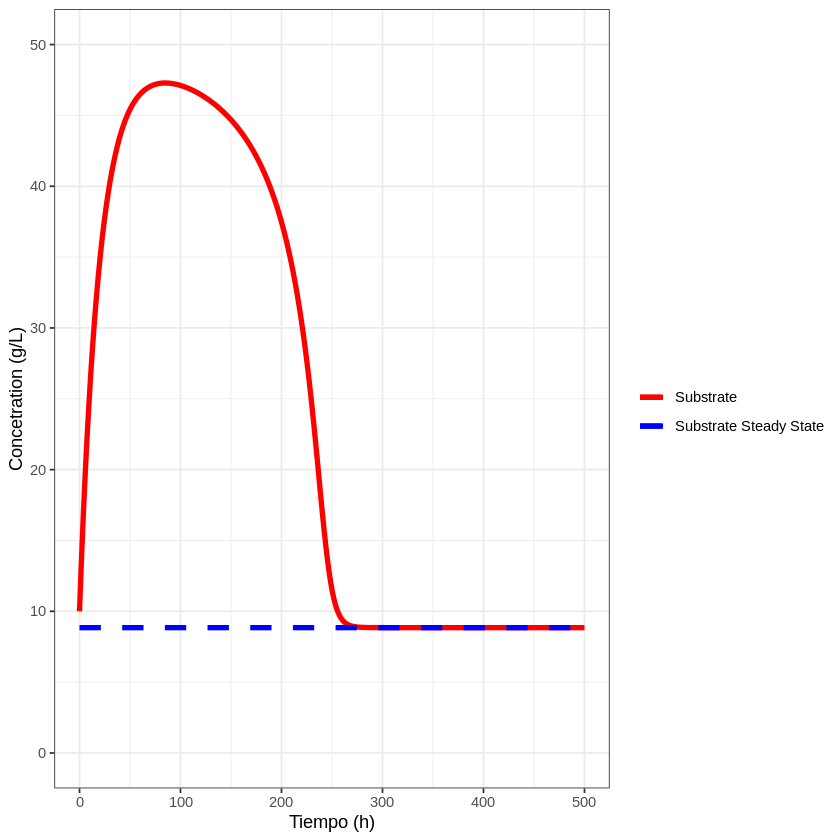

In [216]:
# mostrar resultados de sustrato
ggplot(out, aes(time)) +
  geom_line(aes(y = s, color = "Substrate"), lwd = 1.5) +
  geom_line(aes(y = s_ss, color = "Substrate Steady State"), lwd = 1.5, lty = 2) +
  xlab("Tiempo (h)") +
  ylab("Concetration (g/L)") + 
  ylim(c(0,50)) +
  scale_color_manual("", breaks = c("Substrate","Substrate Steady State"), values = c("red", "blue")) +
  theme_bw()

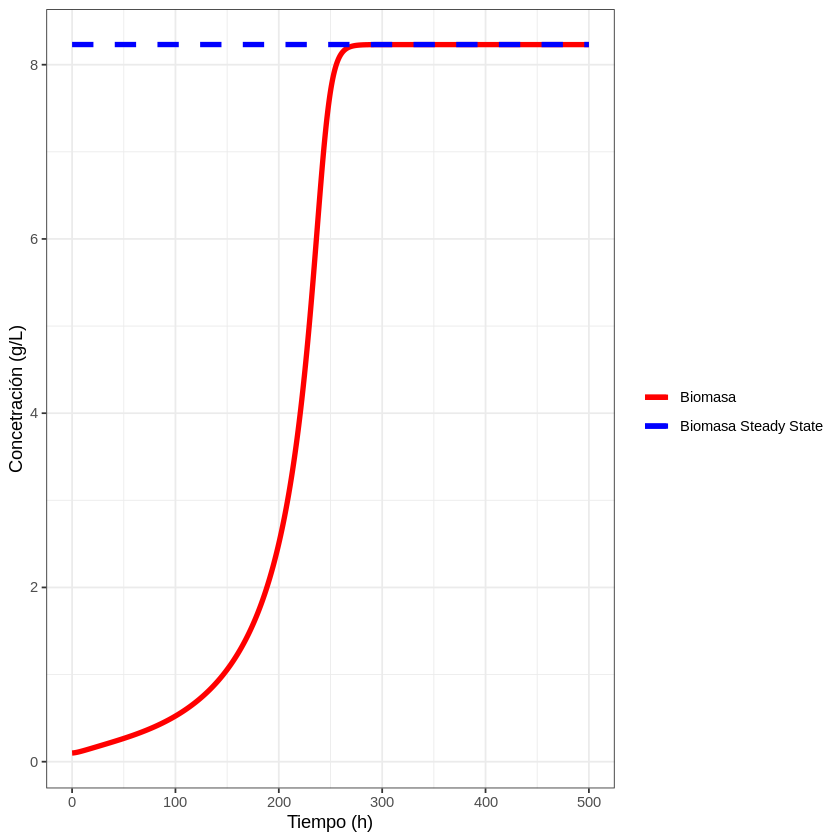

In [217]:
# mostrar resultados de biomasa 
ggplot(out, aes(time)) +
  geom_line(aes(y=x, color = "Biomasa"), lwd = 1.5, lty = 1) +
  geom_line(aes(y=x_ss, color = "Biomasa Steady State"), lwd = 1.5, lty = 2) +
  xlab("Tiempo (h)") +
  ylab("Concetración (g/L)") + 
  scale_color_manual("", breaks = c("Biomasa","Biomasa Steady State"), values = c("red", "blue")) +
  theme_bw()

Vemos que el sistema tiende al punto de equilibrio $ss_2$, considerando que para $D = 0.05\ L$ este punto de equilibrio es estable, el resultado concuerda con el análisis de estabilidad que hemos realizado 

Ahora repetimos la simulación anterior pero seleccionando un valor del parámetro $D$ en el que solo exista el punto de equilibrio trivial $ss_1$

In [218]:
p["D"] <- 0.08

In [219]:
# resolver EDOs
out <- ode(func = model, y = s, times = times, parms = p, method = "rk4")
p["D"] <- 0.05 # regresamos D a su valor original 

In [220]:
# guardar resultados
out <- as.data.frame(out)
# añadir puntos de equilibrio 
out$s_ss <- rep(ss1[1], length(times))
out$x_ss <- rep(ss1[2], length(times))

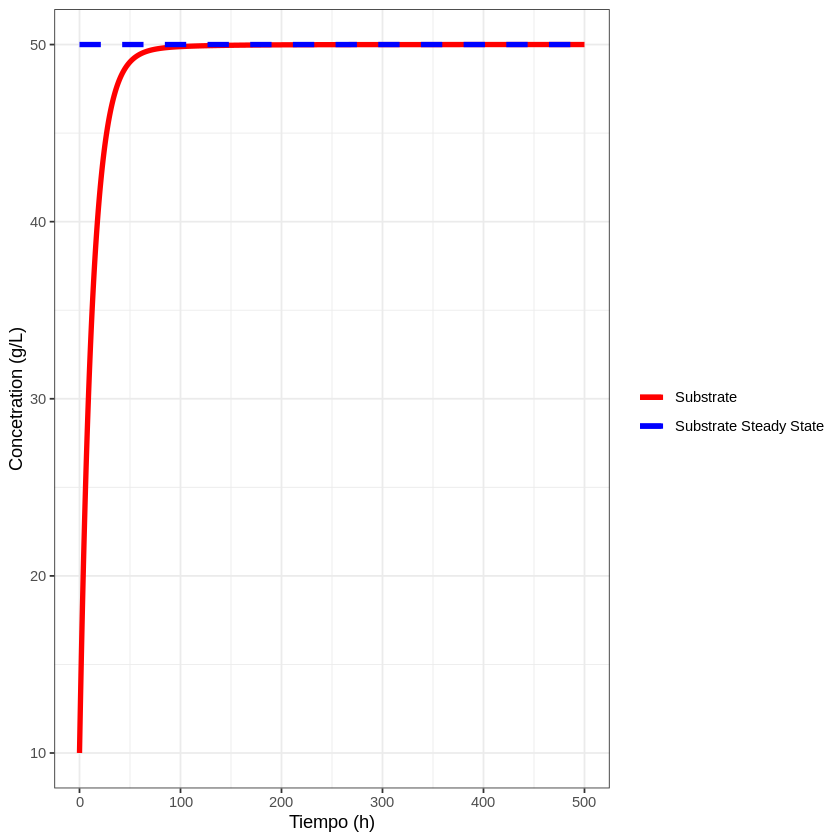

In [221]:
# mostrar resultados de sustrato
ggplot(out, aes(time)) +
  geom_line(aes(y = s, color = "Substrate"), lwd = 1.5) +
  geom_line(aes(y = s_ss, color = "Substrate Steady State"), lwd = 1.5, lty = 2) +
  xlab("Tiempo (h)") +
  ylab("Concetration (g/L)") + 
  scale_color_manual("", breaks = c("Substrate","Substrate Steady State"), values = c("red", "blue")) +
  theme_bw()

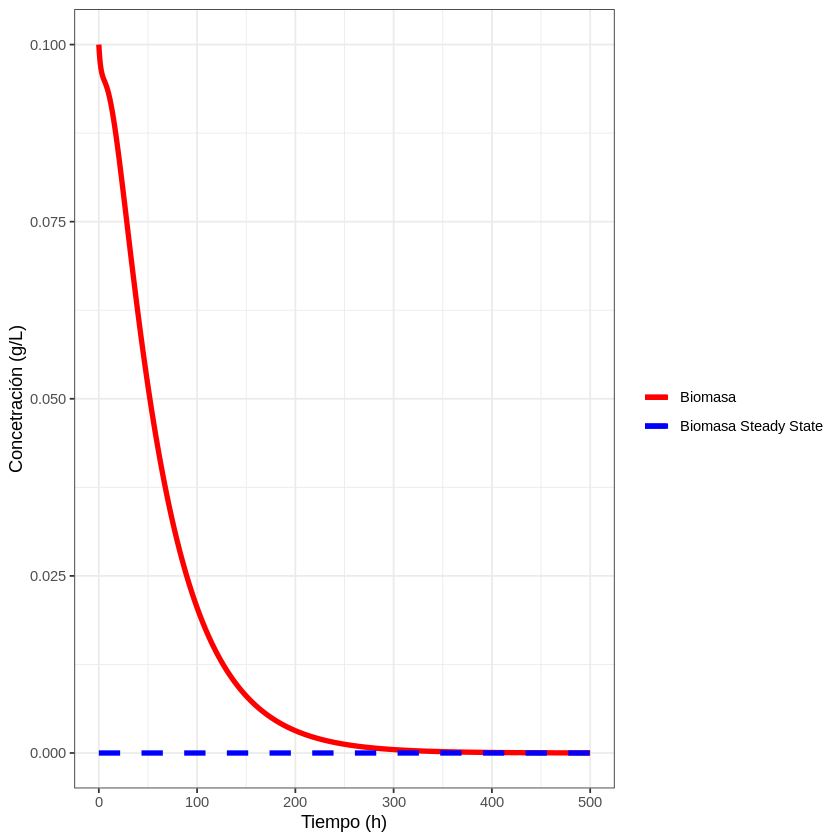

In [222]:
# mostrar resultados de biomasa 
ggplot(out, aes(time)) +
  geom_line(aes(y=x, color = "Biomasa"), lwd = 1.5, lty = 1) +
  geom_line(aes(y=x_ss, color = "Biomasa Steady State"), lwd = 1.5, lty = 2) +
  xlab("Tiempo (h)") +
  ylab("Concetración (g/L)") + 
  scale_color_manual("", breaks = c("Biomasa","Biomasa Steady State"), values = c("red", "blue")) +
  theme_bw()

Vemos que para un valor de $D$ mayor a $D_{crit}$ solo existe el punto de equilibrio $ss_1$. Esto se puede interpretar como que la tasa de dilución es muy grande, o el tiempo de residencia muy corto, para que exista biomasa en el biorreactor. 

Podemos usar la función `plane()` para evaluar el comportamiento bajo diferentes condiciones iniciales 

       s        x 
8.846990 8.230602 
Stable point, eigenvalues:  -0.1714498 -0.05 


s        x 
8.846990 8.230602

     s      x 
67.820 -3.564 
Stable point, eigenvalues:  -0.05 -0.009684749 


s      x 
67.820 -3.564

 s  x 
50  0 
Unstable point, eigenvalues:  -0.05 0.01122449 


s  x 
50  0

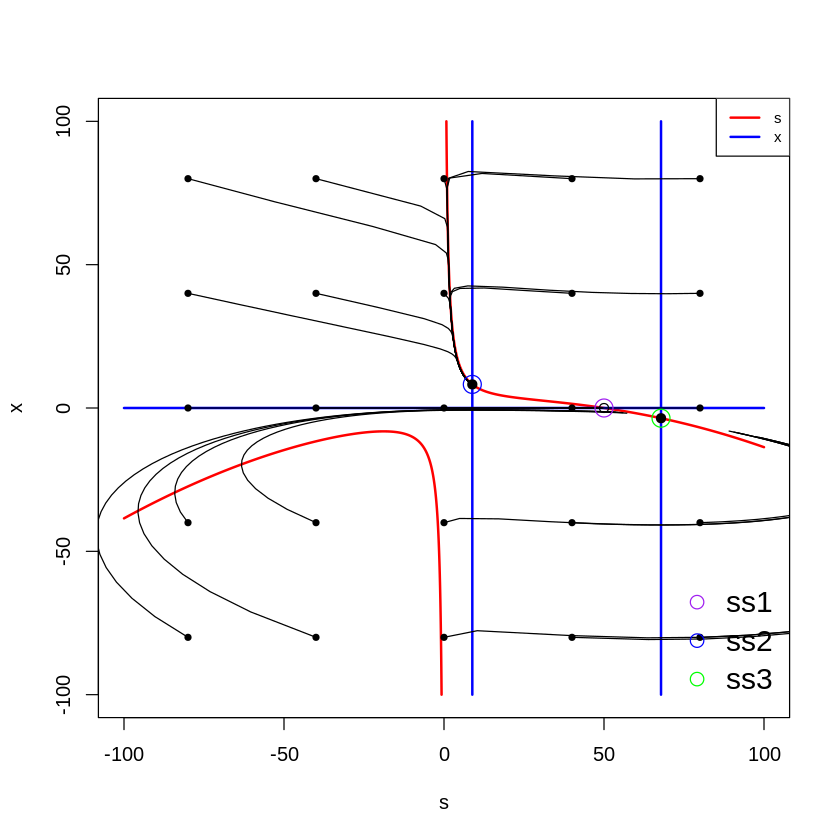

In [224]:
plane(xmin = -100, xmax = 100, ymin = -100, ymax = 100, portrait = T)
newton(state = c(s = 8.846, x = 8.231), plot = T)
newton(state = c(s = 67.82, x = -3.564), plot = T)
newton(state = c(s = 50, x = 0), plot = T)

# para distinguir entre los puntos de equilibrio 
ss_plot <- steady_state(p)
points(x = ss_plot$ss1[1], y = ss_plot$ss1[2], col = "purple", pch = 21, cex = 2)
points(x = ss_plot$ss2[1], y = ss_plot$ss2[2], col = "blue", pch = 21, cex = 2)
points(x = ss_plot$ss3[1], y = ss_plot$ss3[2], col = "green", pch = 21, cex = 2)
legend("bottomright", legend = c("ss1","ss2","ss3"), 
      col = c("purple", "blue", "green"), pch = 21, bty = "n", cex = 1.5)

Podemos decir que el sistema tiene a ambos punto de equilibrio?